# Types of Unsupervised Learning

## Clustering

With clustering the goal is to group similar instances together into clusters. Clustering algorithms can be used for customer segmentation, recommender systems, search engines, image segmentation, semi-supervised learning, and dimensionality reduction.

## Anomaly detection

This works by learning what normal data looks like and any data points that deviate significantly from this are detected as anomalies.

## Density estimation

Here the task is to estimate the probability density function of the random process that generated a dataset. This can be used for anomaly detection since instances located in very low-density areas can be identified as anomalies.

# K-Means

In [26]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [27]:
data = make_blobs(n_samples = 1000, n_features = 2, centers = 5, random_state=45)
X = data[0]

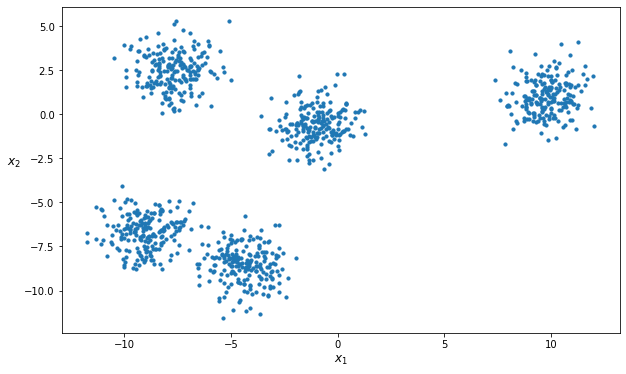

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s = 10)
plt.xlabel('$x_1$', fontsize = 12)
plt.ylabel('$x_2$', fontsize = 12, rotation = 360, labelpad = 10)
plt.show()

## Training a K-Means Clusterer

In [29]:
from sklearn.cluster import KMeans

In [30]:
k = 5 # number of clusters
kmeans = KMeans(n_clusters=k) # specify the number of clusters
y_pred = kmeans.fit_predict(X)

In [31]:
y_pred[:5]

array([2, 4, 2, 1, 2])

In [32]:
y_pred is kmeans.labels_ # An instance's label is the index of the cluster that this instance gets assigned to

True

In [33]:
kmeans.cluster_centers_ # centroids

array([[-1.0165376 , -0.59766242],
       [ 9.78364444,  0.98867297],
       [-9.01950146, -6.69244946],
       [-7.70861941,  2.4817814 ],
       [-4.38278381, -8.55347189]])

In [34]:
X_new = np.array([[0, 2], [-8, -9], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 2, 0, 0])

In [35]:
kmeans.transform(X_new) # measures distance of each instance to every centroid

array([[ 2.78948001,  9.83577556, 12.52637554,  7.72366018, 11.42736028],
       [10.92556744, 20.39685263,  2.5227312 , 11.48547808,  3.64467286],
       [ 4.10819887, 12.9409042 , 11.40955628,  4.73705049, 11.63592729],
       [ 3.67826529, 12.87267162, 10.98797183,  4.70865466, 11.1396289 ]])

## The K-Means Algorithm

Given the centroids we can cluster (label the instances) the data by assigning each instance to the cluster whose centroid is the closest. Given the instance labels we can compute the centroids by computing the average of the instances for each cluster.
If we are given neither we can initialise the centroid locations to be random. We can do this by picking k instances at random and using their locations as the centroids. We can then label the instances and update the centroids until they no longer move.
The algorithm is guaranteed to converge although it may not converge to the most optimal solution.

## Centroid Initialization Methods

We can approximate the locations of the centroids

In [36]:
init = np.array([[10, 1], [-4, -8], [-8, 3], [-1, 0], [-10, -7]])
kmeans = KMeans(n_clusters=5, init = init, n_init=1)

We could also use multiple random initialising of the centroid locations and pick the best solution. The number of initialising is controlled by the n_init hyperparameter and the performance metric used is accessible via the inertia_ method.

In [37]:
kmeans.fit_predict(X)
kmeans.cluster_centers_

array([[ 9.78364444,  0.98867297],
       [-4.38278381, -8.55347189],
       [-7.70861941,  2.4817814 ],
       [-1.0165376 , -0.59766242],
       [-9.01950146, -6.69244946]])

In [38]:
kmeans.fit(X)
kmeans.inertia_ # mean squared distance of each instance and its closed centroids

1976.899314382099

In [39]:
kmeans.score(X) # negative inertia and so greater is better (i.e. less negative score is better)

-1976.8993143820987

### K-Means++ Initialisation

1. The first centroid $C_1$ is chosen uniformly at random from the dataset.
2. Calculate the distance $D(x)$ of each data point to the nearest centroid that has already been chosen.
3. Select the next centroid $C_i$ with a probability proportional to $D(x)^2$

$\Large P(x) = \frac{D(x)^2}{\sum D(X')^2}$

This means points further from existing centroids are more likely to be chosen as the new centroids.

4. Repeat the previous step until k centroid have been selected.

This is the default initialisation technique used by Scikit-Learn but we can change by setting the init hyperparameter to random for example although this is rarely used.

## Accelerated K-Means and Mini-batch K-Means

We can accelerate the K-Means algorithm by avoiding many unnecessary distance calculations. We can exploit the triangle inequality relation and keep track of lower and upper bounds for distances between instances and centroids. This algorithm is used by default in KMeans class in Scikit-Learn. We can set the algorithm hyperparameter to full if we want the original algorithm although this is rarely necessary.

Another way to speed up the KMeans algorithm is to use mini batches at each iteration instead of the full dataset at each iteration. This makes it possible to cluster large datasets that cannot fit in memory.

In [40]:
from sklearn.cluster import MiniBatchKMeans

In [41]:
mb_kmeans = MiniBatchKMeans(n_clusters = 5)

In [42]:
mb_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

In [43]:
mb_kmeans.score(X)

-1977.2445956116576

## Choosing Optimal Number of Clusters

### Elbow Method

In [44]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    inertia.append(-kmeans.score(X))

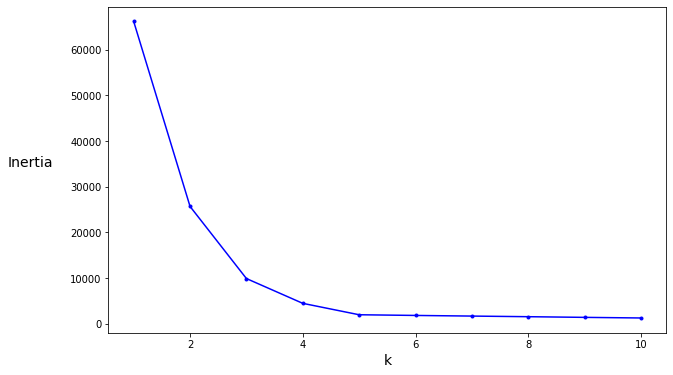

In [45]:
plt.figure(figsize=(10, 6))
k = [k for k in range(1, 11)]
plt.plot(k, inertia, marker = '.', color='b')
plt.xlabel('k', fontsize=14)
plt.ylabel('Inertia', fontsize=14, rotation=360, labelpad=40)
plt.show()

The plot tell us that 4 clusters would be a good choice since this roughly where the elbow occurs. Beyond this number of clusters the inertia barely decreases and below this number of clusters  would not split the datasets properly. From the scatter plot above we can see 5 clusters however the two clusters on the bottom left are close enough to be considered one cluster.

### Silhouette Score Method

The silhouette score is the average silhoutte coefficient over all the instances. An instances silhouette coefficient is equal to

$\Large \frac{b - a}{max(a,b)}$

Here 

a - is the average distance to the other instances in the same cluster

b - mean distances to the instances of the next closest cluster

In [46]:
from sklearn.metrics import silhouette_score

In [47]:
silhouette = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    silhouette.append(silhouette_score(X, kmeans.labels_))

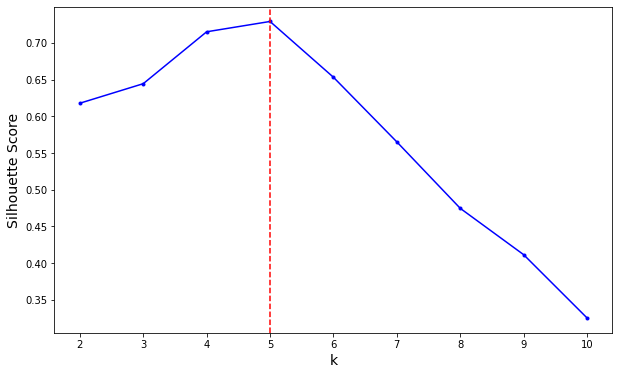

In [48]:
plt.figure(figsize=(10, 6))
k = [k for k in range(2, 11)]
plt.plot(k, silhouette, marker = '.', color='b')
plt.xlabel('k', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.axvline(5, linestyle = '--', c = 'red')
plt.show()

This plot shows that 5 clusters it the most optimal but 4 clusters also works.

## Limits of K-Means

Some limitations of K-Means clustering are

1. We must choose the number of clusters which can be a hassle
2. K-Means usually performs badly when the clusters have different sizes, densities or if they have irregular shapes.

## Using clustering for image segmentation

In [49]:
image = plt.imread('ladybug.png')
image.shape

(533, 800, 3)

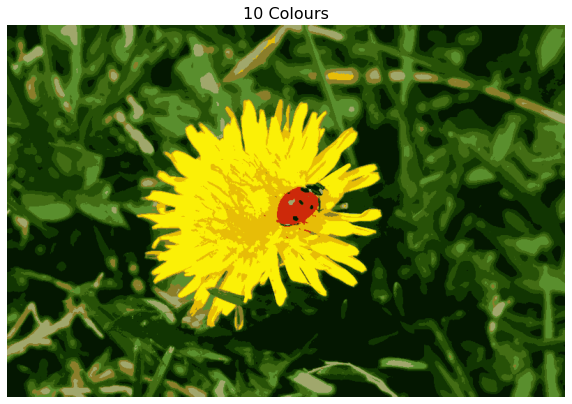

In [50]:
plt.figure(figsize=(10, 8))
X = image.reshape (-1, 3)
kmeans = KMeans(n_clusters=10).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)
plt.imshow(segmented_img)
plt.title('10 Colours', fontsize=16)
plt.axis('off')
plt.show()

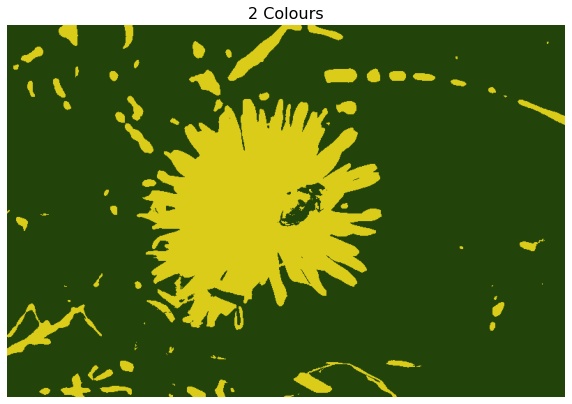

In [51]:
plt.figure(figsize=(10, 8))
X = image.reshape (-1, 3)
kmeans = KMeans(n_clusters=2).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_] # replace the colour of each pixel with the colour of its centroid
segmented_img = segmented_img.reshape(image.shape)
plt.imshow(segmented_img)
plt.title('2 Colours', fontsize = 16)
plt.axis('off')
plt.show()

## Using Clustering for Preprocessing

Clustering can be an efficient approach to dimensionality reduction, it can be used in the preprocessing stage as precursor to a supervised learning algorithm.

In [52]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [53]:
X, y = load_digits(return_X_y = True)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [55]:
log_reg = LogisticRegression(max_iter = 10000, random_state = 21)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=21)

In [56]:
log_reg.score(X_test, y_test)

0.9388888888888889

In [57]:
pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters = 50)),
    ('log_reg', LogisticRegression(max_iter = 10000, random_state = 42))
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg',
                 LogisticRegression(max_iter=10000, random_state=42))])

In [58]:
pipeline.score(X_test, y_test) # Improved score by clustering the data first

0.9555555555555556

# DBSCAN

The DBSCAN defines clusters as continuous regions of high density. It works in the following way

1. For each instance, the algorithm counts how many instances are located within a small distance $\epsilon$. This region is called the instance's neighbourhood

2. If an instance has at least a minimum number of samples\instances min_samples in its neighbourhood then it is called a core instance. Core instances are those that are located in dense regions.

3. All instances in the neighbourhood of a core instance belong to the same cluster. This may include other core instances, sequences of long neighbouring core instances forms a single cluster.

4. An instance which is not a core instance and does not have one in its neighbourhood is considered an anomaly.

In [59]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

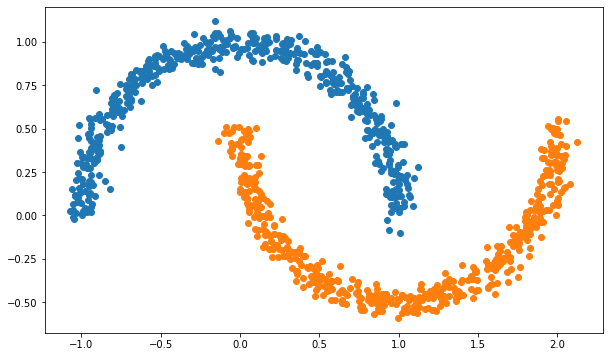

In [60]:
plt.figure(figsize=(10, 6))
X, y = make_moons(n_samples = 1000, noise = 0.05)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1])
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1])
plt.show()

In [61]:
dbscan = DBSCAN(eps = 0.05, min_samples = 5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [62]:
dbscan.labels_[:10] # cluster indices for all the instances
                    # some instance have a cluster index of -1 as they're considered outliers by the algorithm

array([ 0,  1, -1,  1,  2,  3,  0,  4,  2,  5], dtype=int64)

In [63]:
dbscan.core_sample_indices_[:10] # Indices for the core instances

array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [64]:
len(dbscan.core_sample_indices_) # Total number of core indices

807

In [65]:
dbscan.components_ # locations of the core instances

array([[ 0.48313443, -0.3673967 ],
       [ 0.94415814,  0.37166804],
       [ 0.59555139,  0.75662739],
       ...,
       [ 0.73697445,  0.62641891],
       [ 1.19987036, -0.43774127],
       [-0.69322874,  0.74502762]])

In [66]:
outliers = X[np.where(dbscan.labels_ == -1)]

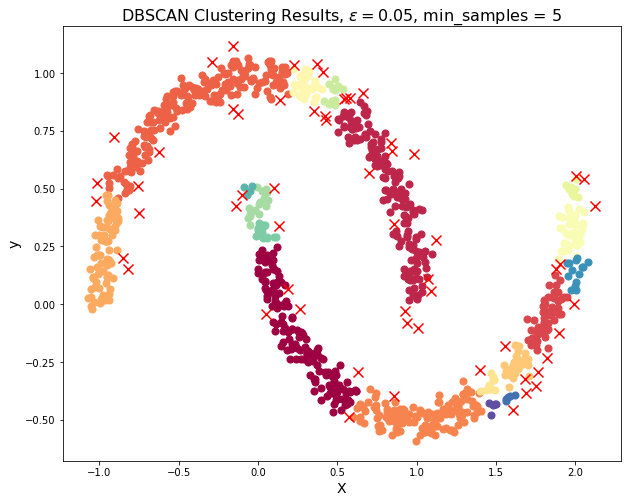

In [67]:
plt.figure(figsize=(10, 8))
colors = plt.cm.Spectral(np.linspace(0, 1, len(np.unique(dbscan.labels_)) - 1))
for k, col in zip(np.unique(dbscan.labels_)[np.where(np.unique(dbscan.labels_) != -1)], colors):
    mask = (dbscan.labels_ == k)
    
    xy = X[mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col])
plt.scatter(outliers[:, 0], outliers[:, 1], marker = 'x', c = 'r', s = 100)
plt.title('DBSCAN Clustering Results, $\epsilon = 0.05$, min_samples = 5', fontsize=16)
plt.xlabel('X', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.show()

In [68]:
dbscan = DBSCAN(eps = 0.20, min_samples = 5)
dbscan.fit(X)
outliers = X[np.where(dbscan.labels_ == -1)]

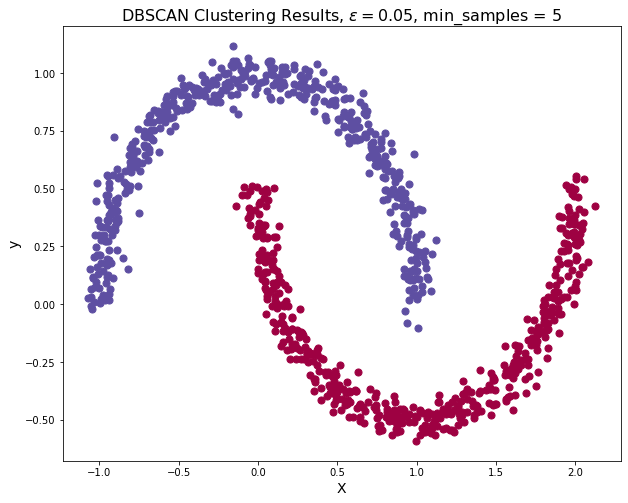

In [70]:
plt.figure(figsize=(10, 8))
colors = plt.cm.Spectral(np.linspace(0, 1, len(np.unique(dbscan.labels_))))
for k, col in zip(np.unique(dbscan.labels_)[np.where(np.unique(dbscan.labels_) != -1)], colors):
    mask = (dbscan.labels_ == k)
    
    xy = X[mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col], label=f'Cluster {k}')
plt.scatter(outliers[:, 0], outliers[:, 1], marker = 'x', c = 'r', s = 100)
plt.title('DBSCAN Clustering Results, $\epsilon = 0.2$, min_samples = 5', fontsize=16)
plt.xlabel('X', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.show()

Increasing epsilon results in 2 clusters and no outliers which is much better than the first plot.

The DBSCAN class does not have a predict() method. This means it cannot predict which cluster a new instance belongs. We can use a classification to predict the cluster new instances belong to.

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [90]:
X_new = np.array([[-1.0, 0], [0, 0.5], [1, -0.5], [2.0, 1.0]])
knn.predict(X_new)

array([1, 0, 0, 0], dtype=int64)

In [91]:
knn.predict_proba(X_new)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

### Anomaly Detection

In [93]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([ 1,  0,  0, -1], dtype=int64)

# Gaussian Mixtures